# Make crops, not war

## Milestone 2

1) That you can handle the data in its size.

The datasets obtained from FAO are quite small in size as we can pre-filter the features that we are interested in before downloading them from the FAO website. 
    
2) That you understand what’s into the data (formats, distributions, missing values, correlations, etc.).

We have begun to clean our data and the formats are clear and understandable. The missing values for our war data have been filled manually. As for the FAO dataset, ... 

3) That you considered ways to enrich, filter, transform the data according to your needs.

4) That you have updated your plan in a reasonable way, reflecting your improved knowledge after data acquaintance. In particular, discuss how your data suits your project needs and discuss the methods you’re going to use, giving their essential mathematical details in the notebook.
    
5) That your plan for analysis and communication is now reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.

# Index
<div class="toc"><ul class="toc-item">
<ul >
<li><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1">Data Exploration</a></li>
    <ul ><li><a href="#Size" data-toc-modified-id="Data-Exploration-1.1">Size</a></li>
                        <ul>
                            <li><a href="#Wars-Datasets" data-toc-modified-id="Data-Exploration-1.1.1">Wars Datasets</a></li>
                            <li><a href="#Agriculture-and-Food-Datasets" data-toc-modified-id="Data-Exploration-1.1.2">Agriculture and Food Datasets</a></li></ul>
                      <li><a href="#Formats" data-toc-modified-id="Data-Exploration-1.2">Format</a></li>
                        <ul>
                            <li><a href="#Wars" data-toc-modified-id="Data-Exploration-1.2.1">Wars Datasets</a></li>
                            <li><a href="#Agriculture-and-Food-Datasets" data-toc-modified-id="Data-Exploration-1.2.2">Agriculture and Food Datasets</a></li></ul>
                      <li><a href="#Missing-values" data-toc-modified-id="Data-Exploration-1.3">Missing values</a></li>
                        <ul>
                            <li><a href="#Wars" data-toc-modified-id="Data-Exploration-1.3.1">Wars Datasets</a></li>
                            <li><a href="#Food-Related" data-toc-modified-id="Data-Exploration-1.3.2">Agriculture and Food Datasets</a></li></ul>
    </ul>
 <li><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1">Data Wrangling</a></li>
    <ul ><li><a href="#Distributions" data-toc-modified-id="Data-Wrangling-1.1">Distributions</a></li>
                        <ul type="circle"><li>War</li><li>Agriculture</li></ul>
                      <li><a href="#Correlations" data-toc-modified-id="Data-Wrangling-1.2">Correlations</a></li>
    </ul>   
<li>Our project</li>
    </ul> </div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

%matplotlib inline

sns.set_style('whitegrid')

pd.plotting.register_matplotlib_converters()  # add the time converter for matplotlib visualisation

# Data Exploration

## Size

### Wars Datasets

For the data on wars, we are going to use data obtained from [Wikidata Query Service](https://query.wikidata.org/). As we selected only the data in which we are interested in, the dataset is quite small as we can see below:

In [2]:
wikipedia_path = 'data/wikipedia/'
state_in_war_file = 'states.json'
political_in_war_file = 'political.json'
terroristic_in_war_file = 'terroristic.json'

wars_states_df = pd.read_json(wikipedia_path + state_in_war_file, orient='records', encoding='utf-8')
wars_political_df = pd.read_json(wikipedia_path + political_in_war_file, orient='records', encoding='utf-8')
wars_terroristic_df = pd.read_json(wikipedia_path + terroristic_in_war_file, orient='records', encoding='utf-8')

For now, we are not interested in the difference between these three categories, but only between state and non-state actors. We therefore only mark whether a participant is state or non-state. Next we stack the dataframes to create a unique one.

In [3]:
wars_states_df['is_state'] = True
wars_political_df['is_state'] = False
wars_terroristic_df['is_state'] = False

raw_wars_df = wars_states_df.append(wars_political_df, sort=True).append(wars_terroristic_df, sort=True)

renamed_wars_df = raw_wars_df.rename(columns={
    'armed_conflictLabel': 'name',
    'participantLabel': 'participant',
    'countryWarLabel': 'country',
    'locationLabel': 'location'
})

print(f"Length of wars dataframe: {renamed_wars_df.size}")

Length of wars dataframe: 8015


The dataframe can be kept in memory.

### Agriculture and Food Datasets

For food-related data, we are using data from [FAOSTAT](http://www.fao.org/faostat/en/#data) service. Here we can query FAO database as well and can download only the datasets we need. Particularly, we are interested in the following datasets:

- [Crops](http://www.fao.org/faostat/en/#data/QC)
- [Live Animals](http://www.fao.org/faostat/en/#data/QA)
- [Crops and livestock products](http://www.fao.org/faostat/en/#data/TP)
- [Annual Population](http://www.fao.org/faostat/en/#data/OA)
- [Land Use](http://www.fao.org/faostat/en/#data/RL)

These datasets are quite small and can be kept in memory.

In [4]:
fao_path = 'data/fao/'

crops_production_file = 'crops_production.csv'
livestock_production_file = 'livestock_production.csv'
population_file = 'population.csv'
land_use_file = 'land_use.csv'

raw_crops_production_df = pd.read_csv(fao_path + crops_production_file, encoding='latin-1')
raw_livestock_production_df = pd.read_csv(fao_path + livestock_production_file, encoding='latin-1')
raw_population_df = pd.read_csv(fao_path + population_file, encoding='latin-1')
raw_land_use_df = pd.read_csv(fao_path + land_use_file, encoding='latin-1')

agricultural_dfs_names = ['crops', 'livestock', 'population', 'land']

agricultural_dfs = [
    raw_crops_production_df,
    raw_livestock_production_df,
    raw_population_df,
    raw_land_use_df
]

for name, df in zip(agricultural_dfs_names, agricultural_dfs):
    print(f"Length of {name} dataframe: {df.size}")

Length of crops dataframe: 1437366
Length of livestock dataframe: 472752
Length of population dataframe: 223725
Length of land dataframe: 170100


All these datasets can be easily handled by a laptop.

## Formats

### Wars

Now, let us check the format of the dataframes

In [5]:
renamed_wars_df.dtypes

name            object
country         object
end_year       float64
is_state          bool
location        object
participant     object
start_year       int64
dtype: object

The other two war dataframes have the same formats. We can see that the years have different types. It can be useful to convert them to `datetime` years.

### Agriculture and Food Datasets

In [6]:
for name, df in zip(agricultural_dfs_names, agricultural_dfs):
    print(f"Types in {name} dataframe:\n {df.dtypes}")

Types in crops dataframe:
 Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object
Types in livestock dataframe:
 Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object
Types in population dataframe:
 Domain Code          object
Domain               object
Area Code             int64
Area          

## Missing values

### Wars

Let us check whether there are missing values in the wars dataframe:

In [7]:
print("Number of wars with missing data: " + 
      str(renamed_wars_df[renamed_wars_df.isnull().any(axis=1)].groupby('name').count().shape[0]))

print("Columns with missing data:")
renamed_wars_df.columns[renamed_wars_df.isnull().any()].tolist()

Number of wars with missing data: 36
Columns with missing data:


['country', 'end_year', 'location']

We can see that 36 wars that have missing values: due to how the Wikidata query is made, the wars without an **end date** have not finished yet. Hence, we can fill the value with the current year:

In [8]:
from datetime import datetime

renamed_wars_df.loc[renamed_wars_df['end_year'].isnull(), 'end_year'] = datetime.now().year

In [9]:
renamed_wars_df['start_year'] = pd.to_datetime(renamed_wars_df['start_year'], format='%Y')
renamed_wars_df['end_year'] = pd.to_datetime(renamed_wars_df['end_year'].astype(int), format='%Y')

Now, let us see check how many wars are missing **country** or **location**:

In [10]:
print("Number of wars with missing data: " + 
      str(renamed_wars_df[renamed_wars_df.isnull().any(axis=1)].groupby('name').count().shape[0]))

Number of wars with missing data: 20


As there are few, we can fill the country manually, and since we are not interested in the precise location of the wars, we can drop the column location.

In [11]:
non_null_wars_df = renamed_wars_df.copy()

# Fix missing country
non_null_wars_df.loc[non_null_wars_df['name'] == 'Tet Offensive', 'country'] = 'Vietnam'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Kosovo War', 'country'] = 'Kosovo'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Soviet–Afghan War', 'country'] = 'Afghanistan'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Cambodian Civil War', 'country'] = 'Cambodia'
non_null_wars_df.loc[non_null_wars_df['name'] == 'First Congo War', 'country'] = 'Democratic Republic of the Congo'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Djiboutian Civil War', 'country'] = 'Djibouti'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Libyan–Egyptian War', 'country'] = 'Lybia,Egypt'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Paquisha War', 'country'] = 'Ecuador,Peru'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Sino-Vietnamese War', 'country'] = 'Vietnam'
non_null_wars_df.loc[non_null_wars_df['name'] == '1982 Ethiopian–Somali Border War', 'country'] = 'Somalia'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Ceneps Guar', 'country'] = 'Ecuador,Peru'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Second Kurdish–Iraqi War', 'country'] = 'Iraq'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Vietnam War', 'country'] = 'Vietnam'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Six-Day War', 'country'] = 'Israel,Egypt,Palestine,Syria'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Tell Abyad offensive', 'country'] = 'Syria'
non_null_wars_df.loc[non_null_wars_df['name'] == '2006 Lebanon War', 'country'] = 'Lebanon,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Gaza–Israel clashes (May 2019)', 'country'] = 'Israel,Palestine'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Tell Abyad offensive', 'country'] = 'Syria'
non_null_wars_df.loc[non_null_wars_df['name'] == '2006 Lebanon War', 'country'] = 'Lebanon,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Gaza–Israel clashes (May 2019)', 'country'] = 'Israel,Palestine'
non_null_wars_df.loc[non_null_wars_df['name'] == '2003 invasion of Iraq', 'country'] = 'Iraq'
non_null_wars_df.loc[non_null_wars_df['name'] == '2014 Israel–Gaza conflict', 'country'] = 'Palestine,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == '2018–19 Gaza border protests', 'country'] = 'Palestine,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Croatian War of Independence', 'country'] = 'Croatia'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Gaza–Israel conflict', 'country'] = 'Palestine, Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Insurgency in the Maghreb (2002–)', 'country'] = '''
    Algeria,Libya,Mauritania,Morocco,Tunisia,Western Sahara'''
non_null_wars_df.loc[non_null_wars_df['name'] == "Lord's Resistance Army insurgency", 'country'] = '''
    Uganda,South Sudan,Democratic Republic of the Congo,Central African Republic'''

# Eplode entries with multiple locations
non_null_wars_df['country'] = non_null_wars_df['country'].str.split(',')
exploded_wars_df = non_null_wars_df.reset_index().explode('country').drop('index', axis=1)
stripped_wars_df = exploded_wars_df.copy()
stripped_wars_df['country'] = exploded_wars_df['country'].str.strip()

Let us see what is left:

In [12]:
stripped_wars_df[stripped_wars_df['country'].isnull()]

,name,country,end_year,is_state,location,participant,start_year
767,War on Terror,NaN,2019-01-01,True,NaN,People's Republic of China,2001-01-01
768,War on Terror,NaN,2019-01-01,True,NaN,France,2001-01-01
769,War on Terror,NaN,2019-01-01,True,NaN,Islamic State of Iraq and the Levant,2001-01-01
770,War on Terror,NaN,2019-01-01,True,NaN,Russia,2001-01-01
771,War on Terror,NaN,2019-01-01,True,NaN,United Kingdom,2001-01-01
772,War on Terror,NaN,2019-01-01,True,NaN,United States of America,2001-01-01
1059,War on Terror,NaN,2019-01-01,False,NaN,Islamic State of Iraq and the Levant,2001-01-01
1060,War on Terror,NaN,2019-01-01,False,NaN,Taliban,2001-01-01
1061,War on Terror,NaN,2019-01-01,False,NaN,Turkistan Islamic Party,2001-01-01
1086,War on Terror,NaN,2019-01-01,False,NaN,Islamic State of Iraq and the Levant,2001-01-01


Since the [War on Terror](https://en.wikipedia.org/wiki/War_on_Terror) can be considered as a series of wars, and has no defined location, we drop it.

In [13]:
final_wars_df = stripped_wars_df[stripped_wars_df['name'] != 'War on Terror']

### Food Related

Knowing that the raw_crops_production_df length:

In [14]:
len(raw_crops_production_df)

102669

Let us first see the different unique in the features, in order to decide if we can drop them:

In [15]:
raw_crops_production_df.groupby('Flag').count()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag Description
Flag,,,,,,,,,,,,,
A,102669,102669,102669,102669,102669,102669,102669,102669,102669,102669,102669,100483,102669


In [16]:
raw_crops_production_df.groupby('Unit').count()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Value,Flag,Flag Description
Unit,,,,,,,,,,,,,
tonnes,102669,102669,102669,102669,102669,102669,102669,102669,102669,102669,100483,102669,102669


In [17]:
raw_crops_production_df.groupby('Element').count()

,Domain Code,Domain,Area Code,Area,Element Code,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
Element,,,,,,,,,,,,,
Production,102669,102669,102669,102669,102669,102669,102669,102669,102669,102669,100483,102669,102669


In [18]:
raw_crops_production_df.groupby('Domain').count()

,Domain Code,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
Domain,,,,,,,,,,,,,
Crops,102669,102669,102669,102669,102669,102669,102669,102669,102669,102669,100483,102669,102669


Since we have only one value for those columns, we can drop them. We just need to keep in mind that the unit used is **tonnes**. Let us drop useless columns, and rename the remaing ones to be more consistent with the wars dataframe naming.

In [19]:
def drop_useless_columns(fao_df):

    fao_df = fao_df.drop(columns=[
        'Domain Code',
        'Area Code',
        'Domain',
        'Element Code',
        'Element',
        'Item Code',
        'Year Code',
        'Flag',
        'Flag Description'
    ])
    
    try:
        fao_df = fao_df.drop('Note', axis=1)
    except KeyError:
        pass
    
    try:
        fao_df = fao_df.drop('Unnamed: 0', axis=1)
    except KeyError:
        pass

    fao_df = fao_df.rename(columns={
        'Area': 'country',
        'Item': 'item',
        'Year': 'year',
        'Value': 'value'
    })

    fao_df['year'] = pd.to_datetime(fao_df['year'], format='%Y')
    
    return fao_df

dropped_agricultural_dfs = list(map(drop_useless_columns, agricultural_dfs))

Now, let us see if there are missing values:

In [20]:
for name, df in zip(agricultural_dfs_names, dropped_agricultural_dfs):
    print("In the {name} dataset there are {missing} missing values.".format(
        name=name,
        missing=df[df.isnull().any(axis=1)].size
    ))

# Saving the clean versions of the agricultural dfs
final_crop_df, final_livestock_df, final_population_df, final_land_df = dropped_agricultural_dfs

In the crops dataset there are 10930 missing values.
In the livestock dataset there are 1890 missing values.
In the population dataset there are 0 missing values.
In the land dataset there are 0 missing values.


We can see that many values are missing. However, since we are going to aggregate the data, we assume that the impact of missing data will be *low*. Moreover, we will need to know in which years we are missing data, in order to weight better the averages we are going to compute. When *we will need more specific data* about some particular countries, we will decide how to handle the problem in a more elaborate way.

# Data Wrangling

## Distributions

Let us plot the following distributions to further explore our datasets:

- The number of years each country is in the war
- The total crop production of all countries changing during the whole time of observation (1961-2017)
- The total amount of livestock of all countries changing during the whole time of observation
- The total area of agricultural land of all countries changing during the whole time of observation
- The total human population changing during the whole time of observation

Let us start with the **number of years in which a country had a war**.

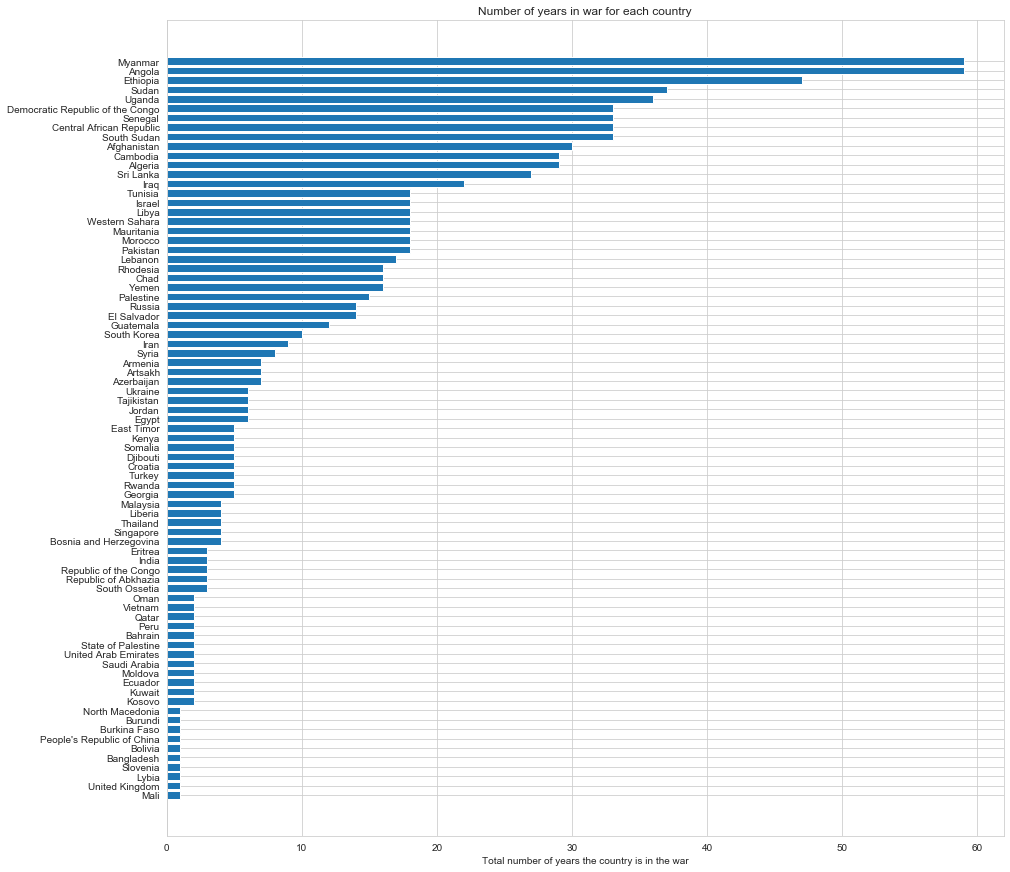

In [21]:
country_wars_df = final_wars_df.groupby(['country', 'name', 'start_year', 'end_year']).count().reset_index()

country_wars_df['range'] = country_wars_df.apply(
    lambda row: list(range(row['start_year'].year, row['end_year'].year + 1)),
    axis=1
)

unique_years_df = country_wars_df.explode('range')[['country', 'range']].drop_duplicates().reset_index().drop('index', axis=1)

years_per_country = unique_years_df.groupby('country').count().sort_values(by='range').reset_index()

plt.figure(figsize=(15,15))
plt.grid(True)
plt.barh(years_per_country['country'], years_per_country['range'])
plt.title('Number of years in war for each country')
plt.xlabel('Total number of years the country is in the war');

We can easily see that luckily many countries didn't have a war (e.g. European countries); some of them, on the other hand, have been in war for all the 57 years of observations. 
But are long wars more or less common than short ones? Let us plot an histogram to make it clear.

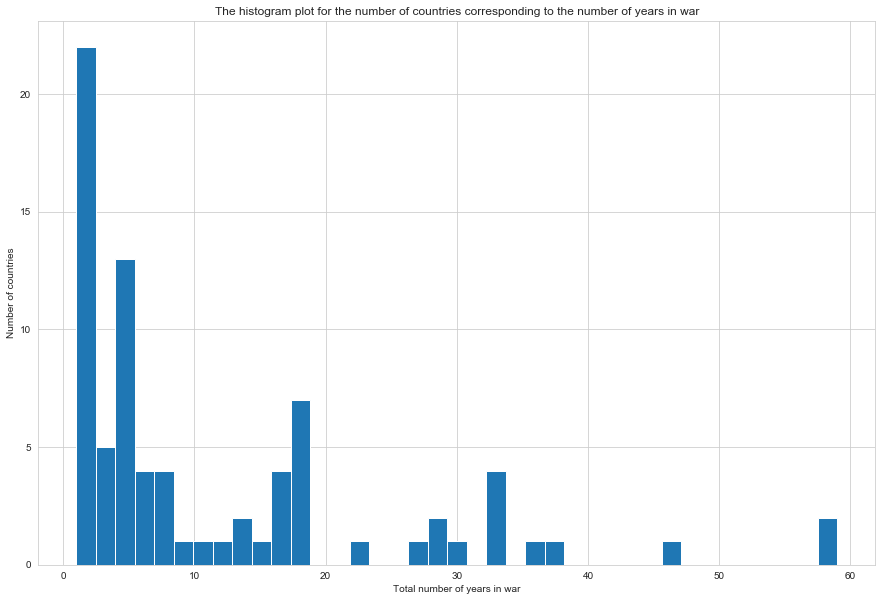

In [22]:
f, ax = plt.subplots(figsize=(15,10))
ax.hist(years_per_country['range'], bins=years_per_country.shape[0] // 2)
ax.set_title('The histogram plot for the number of countries corresponding to the number of years in war')
ax.set_xlabel('Total number of years in war')
ax.set_ylabel('Number of countries');

Luckily enough, we can consider long wars quite exceptional.

Next, we want to plot the **total production of the crops per year and per country**, as an overall, general trend. In addition, we plot **similar** figures for the total amount of livestock for all countries, total agricultural area and total population, each per year and per country.

Before doing that let us check if the total periods of observation for each country are the same in order to exclude wrong interpretation of the data.

In [28]:
# Summimg up the total production for all crops for each country
crop_per_year_per_country = (
    final_crop_df.groupby(['country', 'year'])
        .sum()
        .reset_index()
)

# Summimg up the total amount of livestock for each country
livestock_per_year_per_country = (
    final_livestock_df.groupby(['country', 'year'])
        .sum()
        .reset_index()
)

# Summimg up the total amount of population for each country
population_per_year_per_country = (
    final_population_df.groupby(['country', 'year'])
        .sum()
        .reset_index()
)

# Summimg up the total amount of land used for each country
land_per_year_per_country = (
    final_land_df.groupby(['country', 'year'])
        .sum()
        .reset_index()
)

# Creating a list, that contains all the agricultural datasets
total_productions_per_year_per_country = \
    [crop_per_year_per_country, livestock_per_year_per_country, population_per_year_per_country, land_per_year_per_country]

In [29]:
for name, df in zip(agricultural_dfs_names, total_productions_per_year_per_country):
    
    # Unique values in the total period of observations
    years_of_observations = df.groupby('country').count()['year'].unique()
    
    # Check if there is only one unique period (57 years) that corresponds to each country
    print('Years of observations for {} are the same for all countries: {}'.format(name, len(years_of_observations) == 1))

Years of observations for crops are the same for all countries: False
Years of observations for livestock are the same for all countries: False
Years of observations for population are the same for all countries: False
Years of observations for land are the same for all countries: False


As we can see, different countries have different years of collecting the data, let us show an example for the crop production.

In [30]:
crop_years_observation = crop_per_year_per_country.groupby('country').count()['year'].unique()
crop_years_observation

array([57, 26, 18, 39, 55, 52, 25, 32, 24, 27, 12, 30, 31, 14,  6, 51, 29,
       50], dtype=int64)

`crop_years_observation` array represents the different periods of times in which the country collected the crop production data. We see that some countries made observations for **57** years, but some countries observed for **26**, **18**, etc years. This should affect the interpretation of the total crop production of all countries per year. 

Let us see have a quick glance at which countries collected data for a smaller period of time.

In [31]:
counted_data = crop_per_year_per_country.groupby('country').count().drop('value', axis=1)
for observation in crop_years_observation[1:]:
    print('{} years of observation for these countries: {}'.format(observation, counted_data[counted_data['year'] == observation].index.tolist()))

26 years of observation for these countries: ['Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Croatia', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'North Macedonia', 'Republic of Moldova', 'Russian Federation', 'Slovenia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']
18 years of observation for these countries: ['Belgium', 'Luxembourg']
39 years of observation for these countries: ['Belgium-Luxembourg']
55 years of observation for these countries: ['British Virgin Islands']
52 years of observation for these countries: ['Cayman Islands']
25 years of observation for these countries: ['Czechia', 'Eritrea', 'Ethiopia', 'Slovakia']
32 years of observation for these countries: ['Czechoslovakia', 'Ethiopia PDR']
24 years of observation for these countries: ['Marshall Islands']
27 years of observation for these countries: ['Micronesia (Federated States of)']
12 years of observation for these countries: ['Montenegro', 'Serbia']
30 years of 

We can see that different countries have different periods of observations. 

- It make sense that the [USSR](https://en.wikipedia.org/wiki/Soviet_Union), [Czechoslovakia](https://en.wikipedia.org/wiki/Czechoslovakia), [Yugoslavia SFR](https://en.wikipedia.org/wiki/Socialist_Federal_Republic_of_Yugoslavia), [Former Sudan and South Sudan](https://en.wikipedia.org/wiki/2011_South_Sudanese_independence_referendum), [Pacific Islands Trust Territory](https://en.wikipedia.org/wiki/Trust_Territory_of_the_Pacific_Islands) and [Ethiopia PDR](https://en.wikipedia.org/wiki/People%27s_Democratic_Republic_of_Ethiopia) have smaller periods of data collection as they **no more exist**,they have been replaced. The same we can say [CIS member states](https://en.wikipedia.org/wiki/Commonwealth_of_Independent_States), Belgium, Luxembourg, Czechia, Serbia and other countries have smaller periods as they became **independent** recently. Hence we can conclude that the discrepancy between data time periods caused by these events does not influence our data.

- For other countries (United States Virgin Islands, Marshall Islands, Cayman Islands, etc) we can say that their contributions to the total production of crops, total amount of livestock, population and agricultural land area is **unsignificant** as they are really small and not global production leaders.

57 years is a **period long enough** to observe important changes at national level. However, the visualisation of total value of crop production/livestock/land area should not be affected by the changes proviously discussed.

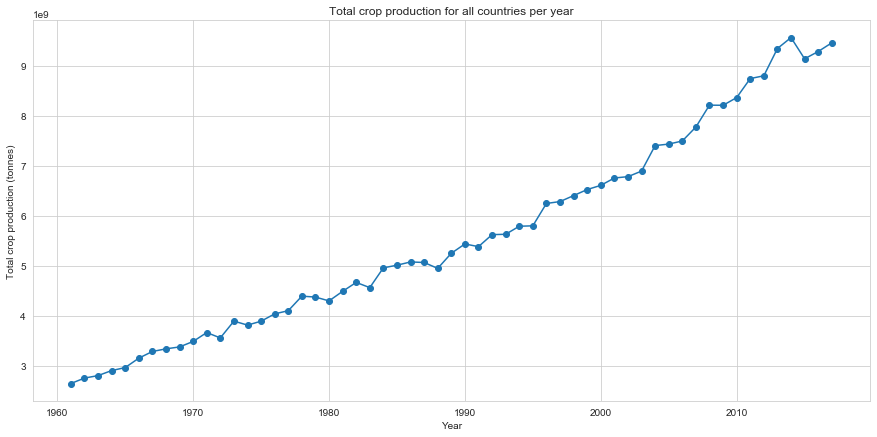

In [32]:
f, ax = plt.subplots(figsize=(15, 7))

# Summing up the total production for every country per year
crop_per_year = crop_per_year_per_country.groupby('year').sum().reset_index()

ax.plot_date(x=crop_per_year['year'], y=crop_per_year['value'], linestyle="-", xdate=True);
ax.set_title('Total crop production for all countries per year')
ax.set_xlabel('Year')
ax.set_ylabel('Total crop production (tonnes)');

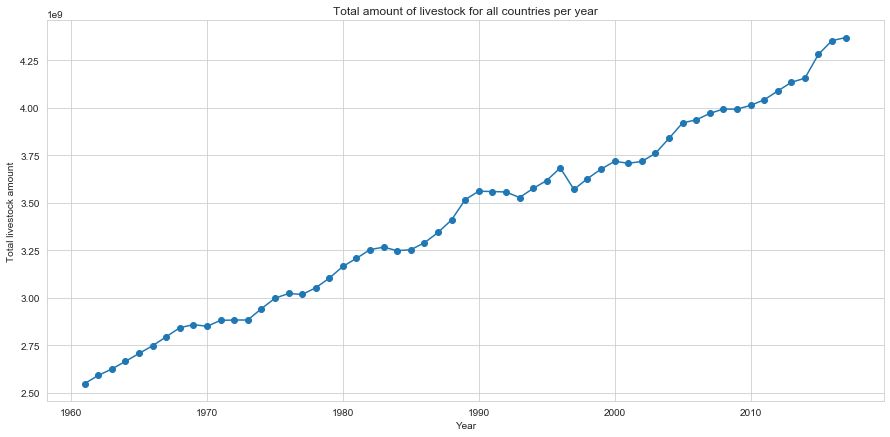

In [33]:
f, ax = plt.subplots(figsize=(15, 7))

# Summing up the total amount for every country per year
livestock_per_year = livestock_per_year_per_country.groupby('year').sum().reset_index()

ax.plot_date(x=livestock_per_year['year'], y=livestock_per_year['value'], linestyle="-", xdate=True);
ax.set_title('Total amount of livestock for all countries per year')
ax.set_xlabel('Year')
ax.set_ylabel('Total livestock amount');

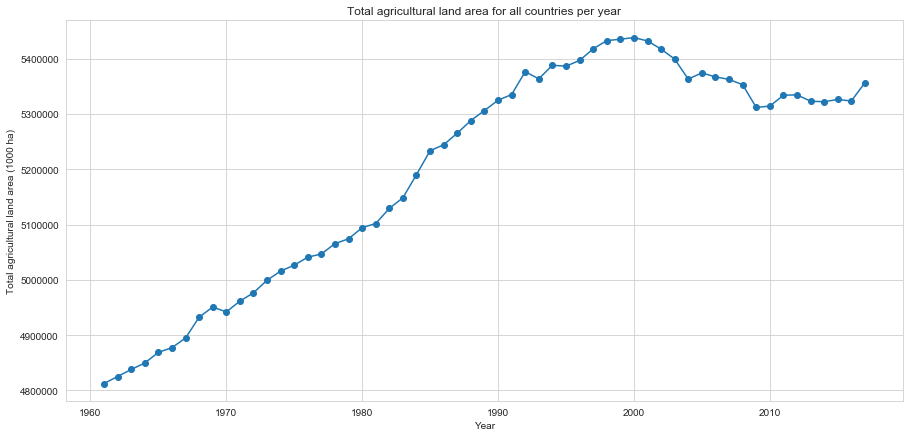

In [34]:
f, ax = plt.subplots(figsize=(15, 7))

# Summing up the total amount for every country per year
land_per_year = land_per_year_per_country.groupby('year').sum().reset_index()

ax.plot_date(x=land_per_year['year'], y=land_per_year['value'], linestyle="-", xdate=True);
ax.set_title('Total agricultural land area for all countries per year')
ax.set_xlabel('Year')
ax.set_ylabel('Total agricultural land area (1000 ha)');

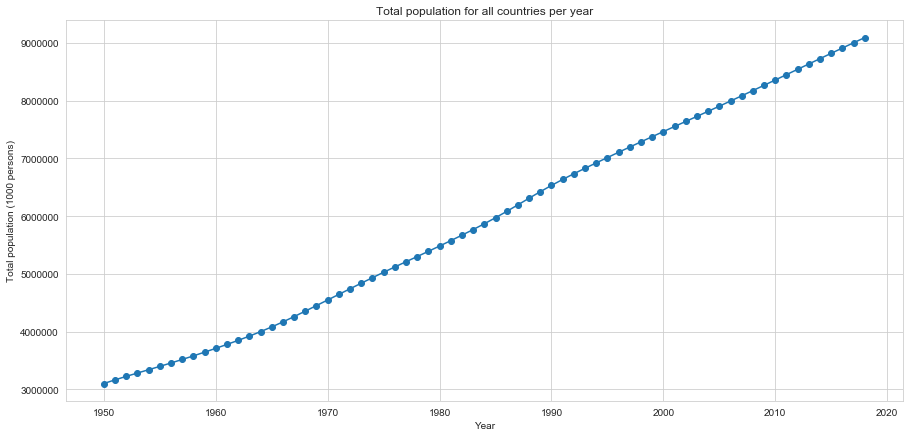

In [35]:
f, ax = plt.subplots(figsize=(15, 7))

# Summing up the total amount for every country per year
population_per_year = population_per_year_per_country.groupby('year').sum().reset_index()

ax.plot_date(x=population_per_year['year'], y=population_per_year['value'], linestyle="-", xdate=True);
ax.set_title('Total population for all countries per year')
ax.set_xlabel('Year')
ax.set_ylabel('Total population (1000 persons)');

As expected, the total amount and production of goods **have increased** as well as the total population. Also we observe that the discrepancy of the time points of observation, indeed, does not influence the interpretation of the data. Interestingly, in the year 2000 the amount of agricultural land area reached its peak and then decreased. 

## Correlations

Our final aim is to **compare** the livestocks and agricultural production of different countries. Would it be fair though to compare big countries with tiny ones? Densely populated and almost uninhabited ones? We started looking for **normalisation** criteria. 
Of course, the *bare size* of a country is not a good normalization factor. What about Russia and its permafrost areas, or Egypt and its deserts?

We therefore came up with two factors that we believe to be more representative:
- **Agricultural area**: the actual amount of area used for cultivation. In this way we could compare the production expressed in [tonnes/km^2].This information is contained into the final_land_df.
- **Population**: the number of inhabitants of a country. In this way we could compare the production expressed in [tonnes-per-person] This information is contained into the final_population_df.

The following analysis has been done to understand if these criteria are valid and if we can really obtain more meaningful data by comparing normalised productions (both for area and population ) instead of the absolute one. In order to do so, we examined possible **correlations** between different observations in our datasets. 

First, let us calculate the correlation between **total production of crops**, the **amount of livestock** and the **agricultural area used** over the observed time period. If some time points are present in one dataset and missing in another, then we drop the row that corresponds to this time point. Also, now that we are digging deeper into the data, missing data could affect our results in a non-negligable way. Let us check this.

In [37]:
# Get a set representation of the countries for each dataset
crop_unique_countries = set(crop_per_year_per_country['country'].unique())
livestock_unique_countries = set(livestock_per_year_per_country['country'].unique())
population_unique_countries = set(population_per_year_per_country['country'].unique())
land_unique_countries = set(land_per_year_per_country['country'].unique())

# Get non-common countries
all_countries = crop_unique_countries.union(livestock_unique_countries, population_unique_countries, land_unique_countries)
intersected_set_of_countries = crop_unique_countries.intersection(livestock_unique_countries, population_unique_countries, land_unique_countries)
non_common_countries = all_countries.symmetric_difference(intersected_set_of_countries)
non_common_countries

{'Andorra',
 'Anguilla',
 'Aruba',
 'Bonaire, Sint Eustatius and Saba',
 'Channel Islands',
 'China, Macao SAR',
 'CuraÃ§ao',
 'Falkland Islands (Malvinas)',
 'Gibraltar',
 'Greenland',
 'Holy See',
 'Isle of Man',
 'Maldives',
 'Marshall Islands',
 'Mayotte',
 'Monaco',
 'Netherlands Antilles (former)',
 'Norfolk Island',
 'Northern Mariana Islands',
 'Palau',
 'Saint BarthÃ©lemy',
 'Saint-Martin (French Part)',
 'San Marino',
 'Sint Maarten (Dutch Part)',
 'Turks and Caicos Islands'}

The countries listed above are the non-overlapping countries, meaning that some data are missing. Most of them are not relevant for our project, hence we can exclude them for this initial analysis.

Now we can **merge** 4 agricultural datasets into one and calculate the Pearson correlations between 4 different features for each country: 

- Total crop production
- Total amount of livestock
- Total population
- Total agricultural land area

In [38]:
# Merge 4 datasets into one
merged_data = (crop_per_year_per_country 
                .merge(livestock_per_year_per_country, how='inner',
                    left_on=['country','year'], right_on = ['country','year'],
                    suffixes=('_crop', '_livestock'))
          
                .merge(population_per_year_per_country, how='inner',
                    left_on=['country','year'], right_on = ['country','year'])             
                .rename(columns={'value' : 'value_population'})
          
                .merge(land_per_year_per_country, how='inner',
                    left_on=['country','year'], right_on = ['country','year'])
                .rename(columns={'value' : 'value_land_area'})
         )

merged_data

,country,year,value_crop,value_livestock,value_population,value_land_area
0,Afghanistan,1961-01-01,5909080.0,25104700.0,9169.410,37700.0
1,Afghanistan,1962-01-01,5934534.0,25442170.0,9351.441,37760.0
2,Afghanistan,1963-01-01,5686583.0,25605000.0,9543.205,37810.0
3,Afghanistan,1964-01-01,6147934.0,25855300.0,9744.781,37873.0
4,Afghanistan,1965-01-01,6274668.0,26205500.0,9956.320,37875.0
...,...,...,...,...,...,...
11310,Zimbabwe,2013-01-01,3531221.0,11489859.0,13350.373,16200.0
11311,Zimbabwe,2014-01-01,3637340.0,9437613.0,13586.707,16200.0
11312,Zimbabwe,2015-01-01,2519574.0,9458463.0,13814.629,16200.0
11313,Zimbabwe,2016-01-01,3054562.0,10676793.0,14030.331,16200.0


In [39]:
# Calculate the correlation matrix for each country with 4 features
corr_data = merged_data.groupby('country').corr().fillna(0)

# Getting the paired correlations
crop_land_area_corr = corr_data.xs('value_crop', level=1)['value_land_area']
crop_population_corr = corr_data.xs('value_crop', level=1)['value_population']
livestock_population_corr = corr_data.xs('value_livestock', level=1)['value_population']

corr_data

value_crop  value_livestock  value_population  \
country                                                                       
Afghanistan value_crop          1.000000         0.295728          0.773567   
            value_livestock     0.295728         1.000000          0.064128   
            value_population    0.773567         0.064128          1.000000   
            value_land_area    -0.029503        -0.106985         -0.335440   
Albania     value_crop          1.000000         0.038380          0.591984   
...                                  ...              ...               ...   
Zambia      value_land_area     0.823103         0.942049          0.973502   
Zimbabwe    value_crop          1.000000         0.167213          0.079248   
            value_livestock     0.167213         1.000000          0.800283   
            value_population    0.079248         0.800283          1.000000   
            value_land_area    -0.032330         0.770684          0.938629   

                              value_land_area  
country                                        
Afghanistan value_crop              -0.029503  
            value_livestock         -0.106985  
            value_population        -0.335440  
            value_land_area          1.000000  
Albania     value_crop              -0.296381  
...                                       ...  
Zambia      value_land_area          1.000000  
Zimbabwe    value_crop              -0.032330  
            value_livestock          0.770684  
            value_population         0.938629  
            value_land_area          1.000000  

[884 rows x 4 columns]

A quick glance at the correlation matrix shows that some countries seem to rely more on livestock than on crop production to maitain their population growths. For example, in Afghanistan, we see that the population size has a very strong correlation with crop production and a nearly zero correlation with the total livestock. Looking at Zimbabwe, we see the exact opposite situation. We will plot these correlations in order to visualize the entire dataset.

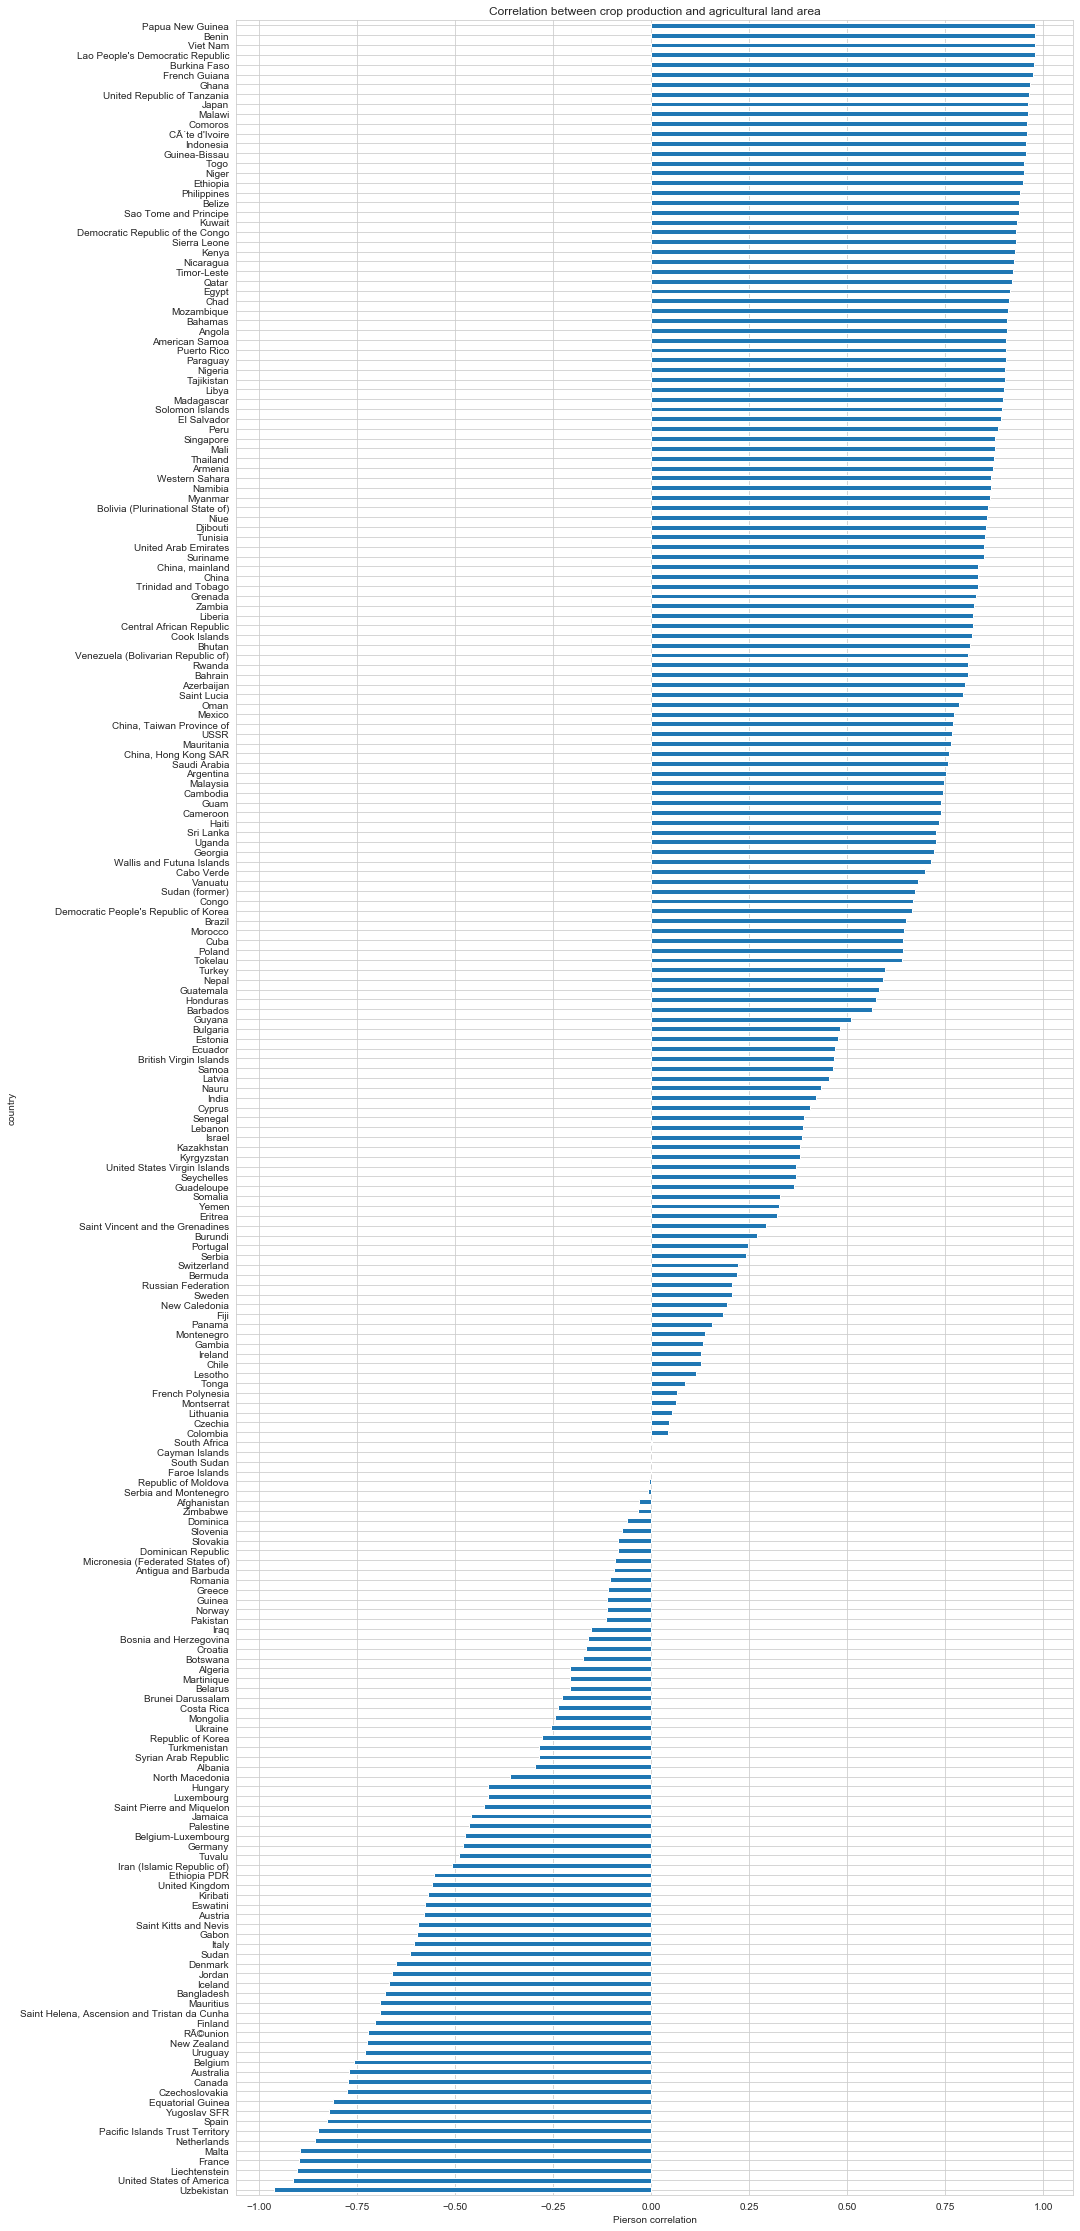

In [40]:
f, ax = plt.subplots(figsize=(15, 40))
crop_land_area_corr.sort_values().plot.barh(ax=ax)
ax.set_title('Correlation between crop production and agricultural land area')
ax.set_xlabel('Pierson correlation');

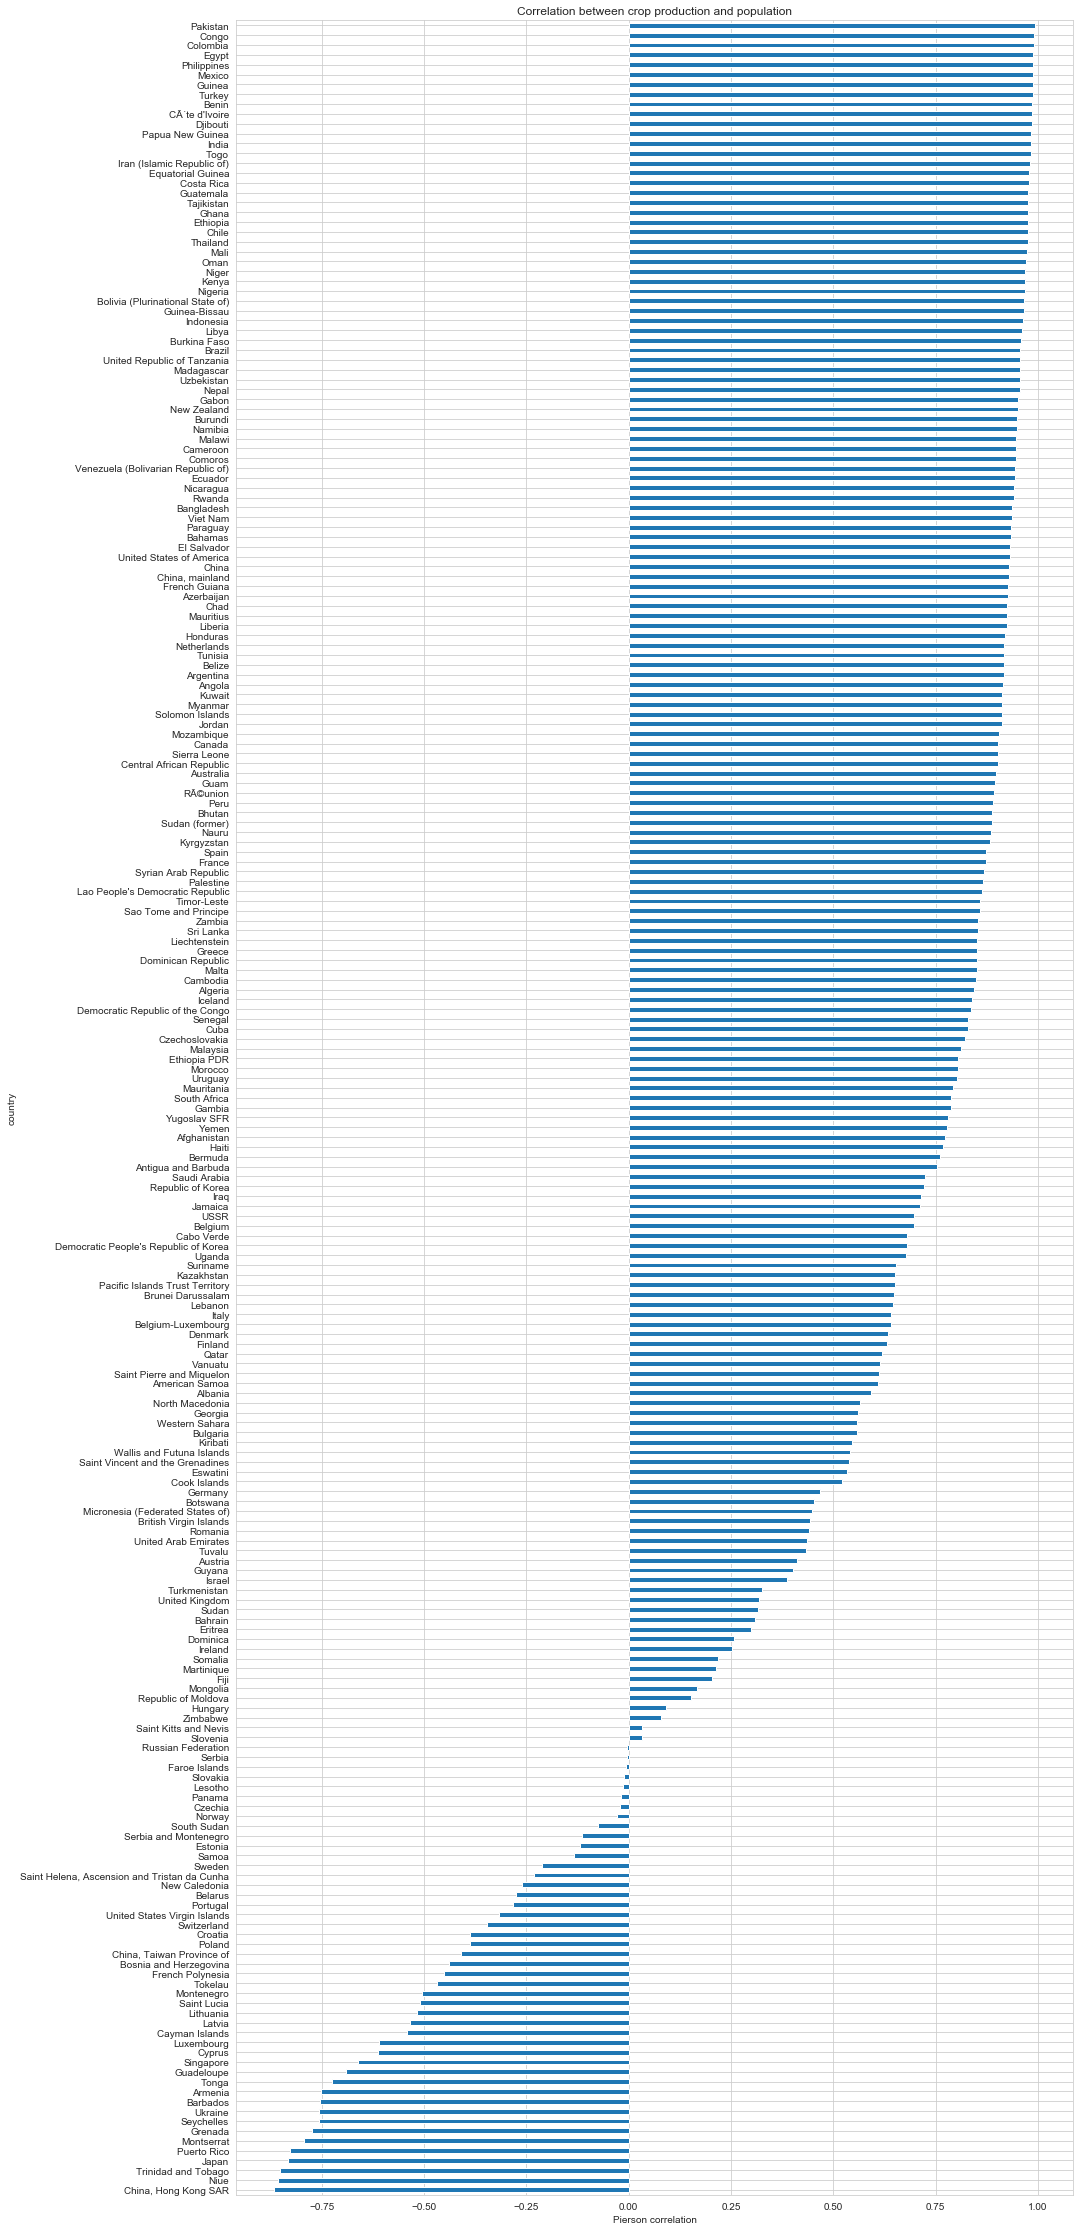

In [41]:
f, ax = plt.subplots(figsize=(15, 40))
crop_population_corr.sort_values().plot.barh(ax=ax)
ax.set_title('Correlation between crop production and population')
ax.set_xlabel('Pierson correlation');

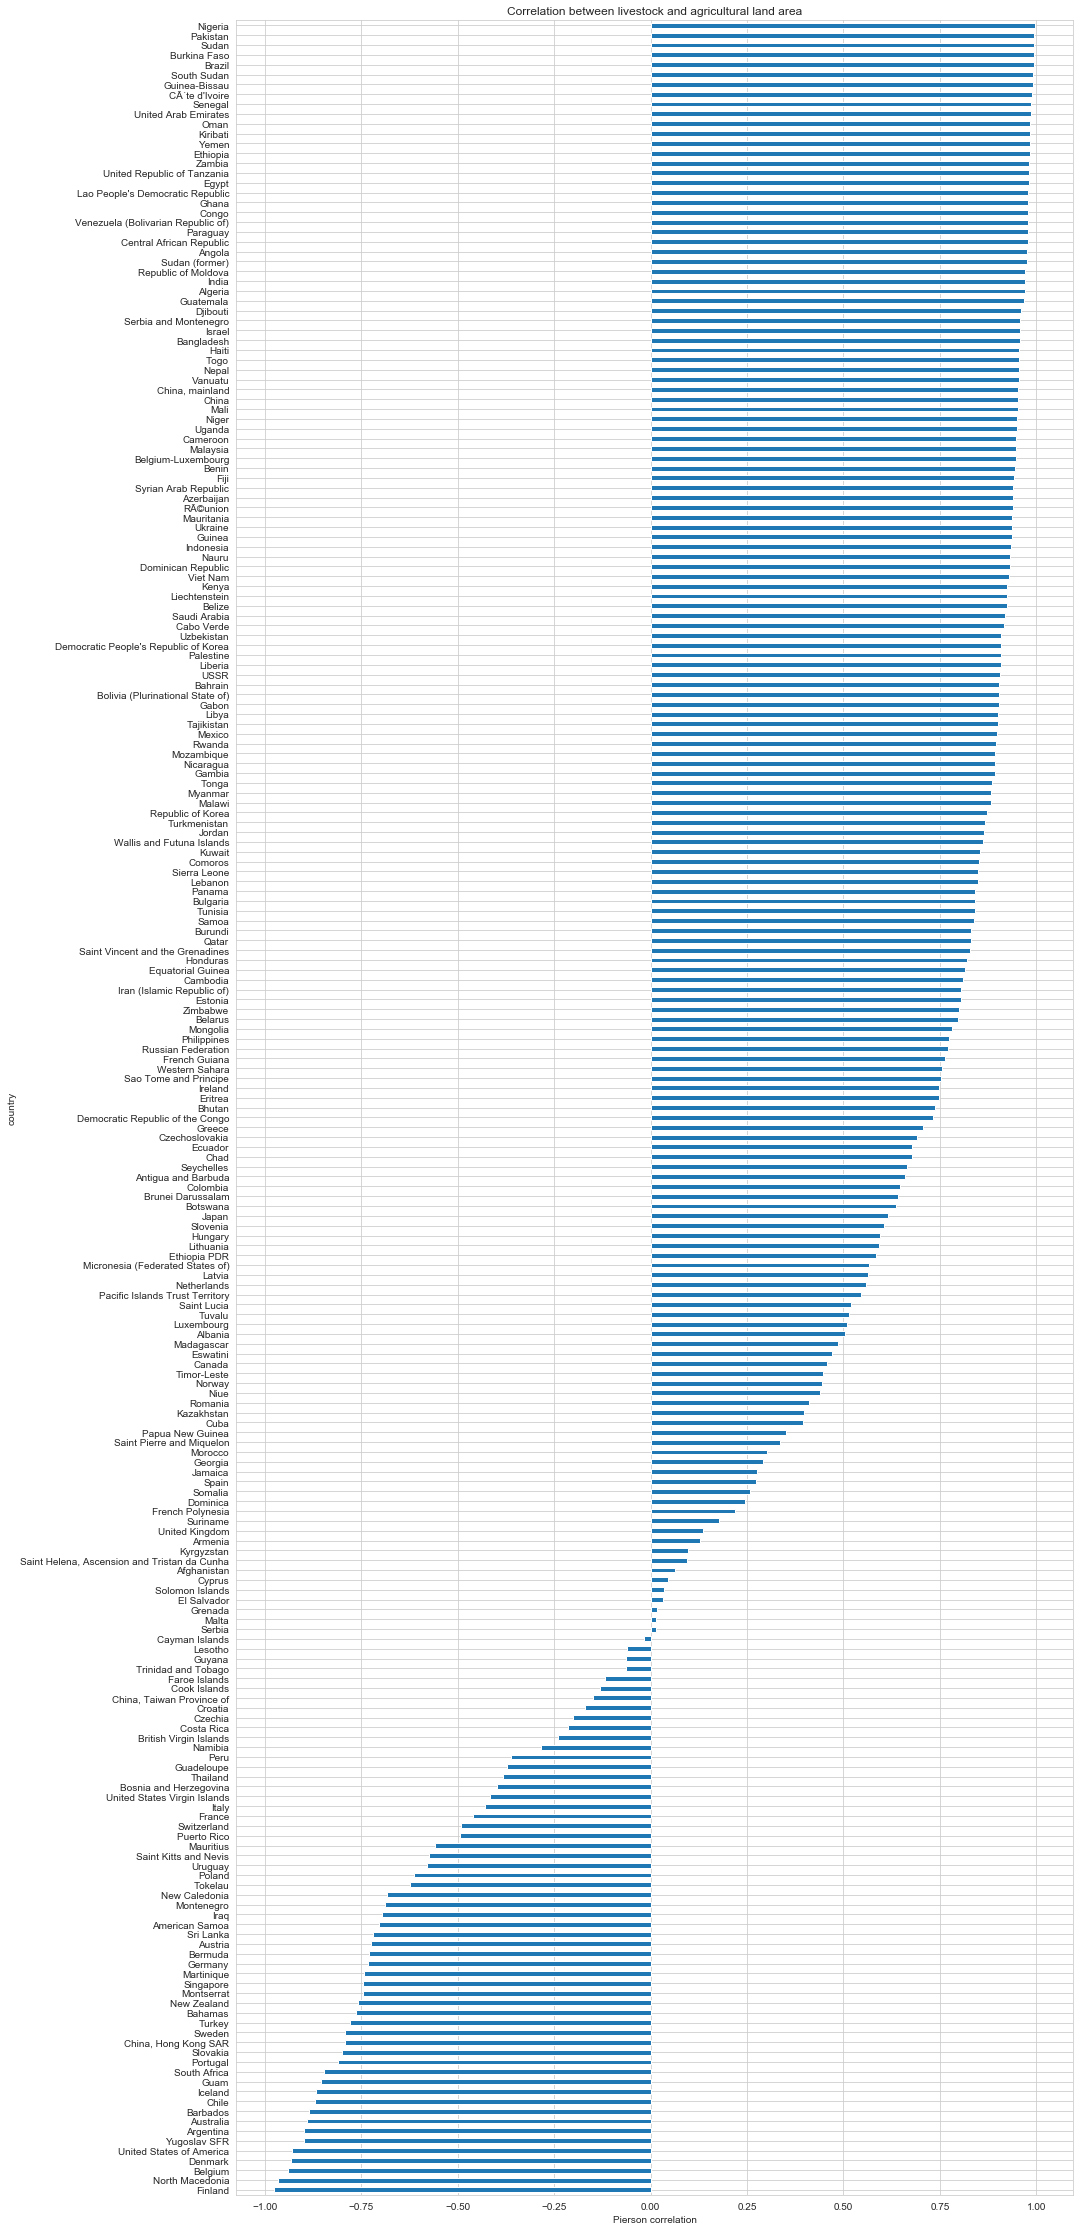

In [60]:
f, ax = plt.subplots(figsize=(15, 40))
livestock_population_corr.sort_values().plot.barh(ax=ax)
ax.set_title('Correlation between livestock and agricultural land area')
ax.set_xlabel('Pierson correlation');

Surpisingly, the **correlation** between our features is very **variable** with time and this is true for each country.

- The increase of the **use of the land for agriculture** does not necessarily cause the increase of the **crop production** and vice versa.
- The increase of the **population** does not necessarily cause the increase of the **crop production** and vice versa.
- The increase of the **population** does not necessarily cause the increase in the amount of **livestock** and vice versa.

We can conclude that both the population and the agricultural land area are **not good normalising factors**. Therefore, we should treat every feature as an independent one for future analysis.